> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row .

    ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

    ● ‘Neighborhood’ indicates the location of the hospital.

    ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

    ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment,and ‘Yes’ if they did not show up.

### Dataset Description 

>noshowappointments CSV file contains the data we going analyze.

   

### Question(s) for Analysis
>What are the important factors and analysis  for us that we need to know continuously to predict whether the patient will appear on time? 

In [46]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**




In [48]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Print the top 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [49]:
#print the bottom 5 rows
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [50]:
print("The shape of the DataFrame is = {}".format(df.shape))

The shape of the DataFrame is = (110527, 14)


In [8]:
# Features in the DataFrame 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [51]:
# Describing the numerical attributes:
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [52]:
# Getting information of the categorical attributes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [53]:
#check for duplication of dataframe
df.duplicated().sum()

0

In [54]:
#check of duplicated PatientId
df['PatientId' ].duplicated().sum()

48228

In [55]:
#check of duplicated PatientId ,SMS_received and'No-show
df.duplicated(['PatientId' , 'SMS_received','No-show']).sum()

28700

In [56]:
# Counting gender classes
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [57]:
#getting the anomalous instance
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


<a id='wrangling'></a>
## Data cleaning

In [58]:
#Removing duplicated PatientId ,SMS_received and'No-show
df.drop_duplicates(['PatientId','SMS_received','No-show'],inplace=True)
print("The shape of the DataFrame is = {}".format(df.shape))

The shape of the DataFrame is = (81827, 14)


In [59]:
#Removing unnecessary data
df.drop(['PatientId' , 'AppointmentID','ScheduledDay', 'AppointmentDay'], inplace=True ,axis =1 )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [60]:
#Removing the anomalous instance
df.drop(99832,inplace=True) 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## General look

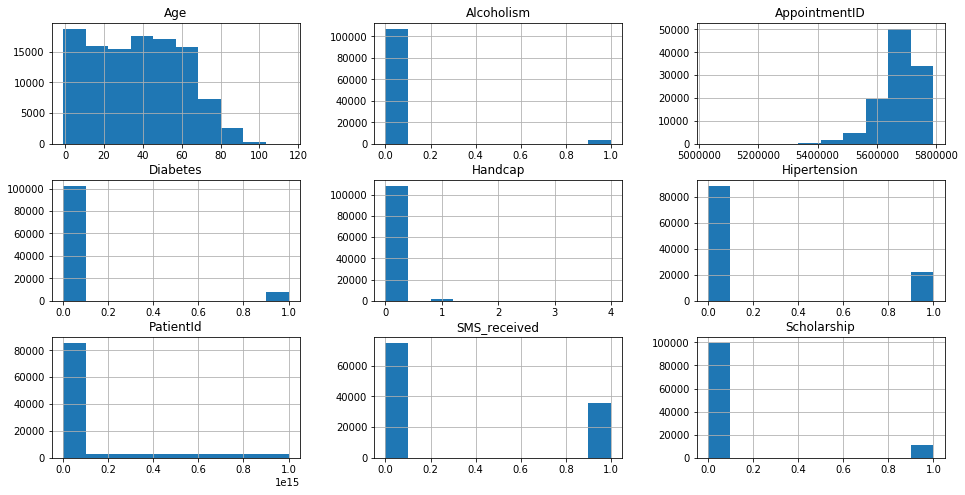

In [110]:
# use the , and more code cells , to explore your data .Don't forget to add
# Markdown cells to document your observations and findings  .

df.hist(figsize=(16,8)) ;

In [61]:
# NoShow and Show Count of Patients
show = df['No-show'].value_counts()[0]
NoShow = df['No-show'].value_counts()[1]
print("Show = {} ".format (show))
print('NoShow = {}'.format(NoShow) )


Show = 62590 
NoShow = 19236


In [62]:
# NoShow and Show '%' of Patients
print("Percent of Patients who Showed Up = {:.2f}%".format(show/(df.shape[0])*100))
print("Percent of Patients who Did Not Showed Up = {:.2f}%".format(NoShow/(df.shape[0])*100))


Percent of Patients who Showed Up = 76.49%
Percent of Patients who Did Not Showed Up = 23.51%


From the above information we can see that there is clearly a class imbalance. Around 80% of the patients are coming for the visit after an appointment and around 20% are skipping their appointments.

<a id='eda'></a>
### what is the percentage of Patients attending?

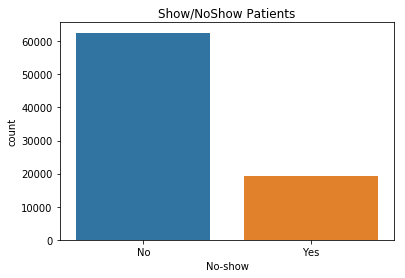

In [63]:
def attendance(df , attended):
    ax = sns.countplot(x=df[attended], data=df)
    ax.set_title("Show/NoShow Patients")
    plt.show()
attendance(df , 'No-show')

In [64]:
# Counting gender classes
df.Gender.value_counts()

F    53491
M    28335
Name: Gender, dtype: int64

<a id='eda'></a>
### what is the percentage of sexes attending?

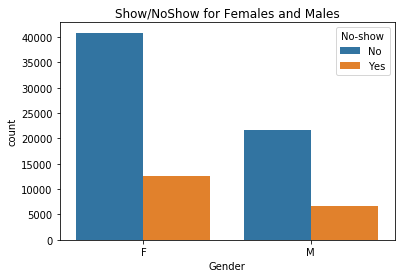

In [66]:
def attendance(df , attended , col):
    ax = sns.countplot(x=df[col], hue=df[attended], data=df)
    ax.set_title("Show/NoShow for Females and Males")
    plt.show()

attendance(df,'No-show','Gender')
    

we can clearly see that 'Female' patients usually have more appointments that 'Male' patients. So, Gender might be an important factor. But if we closely look at the NoShow distribution across Male's and Female's it is almost the same. So, Gender may not play an important role in determining if a patient comes for a visit or not

In [67]:
df.groupby(['No-show'] ,as_index =False).mean().sort_values(by='No-show', ascending = False)


,No-show,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
1,Yes,34.425036,0.110522,0.170098,0.065398,0.029840,0.017623,0.456852
0,No,37.400463,0.092922,0.204266,0.073302,0.023438,0.020690,0.332497


mean age for showed patients s 37, no shoved is 34 showed patients receive sms less than no show patients which means we have to revise our sms compaghine


<a id='eda'></a>
###  does age and SMS_received affect the attendance

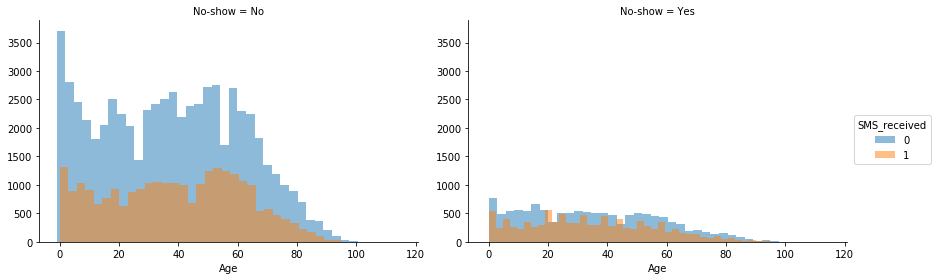

In [122]:
g = sns.FacetGrid(df , col= 'No-show', hue='SMS_received',size =4 , aspect =1.5)
g.map(plt.hist , 'Age' , alpha =.5 , bins =40)
g.add_legend();


-Number of showing patients without receiving sms is greater than showing patients with receiving sms , which means that we need to revisit our sms compaghin
-Age has  clear effect on attendance

<a id='eda'></a>
### does Hypertension affect the attendance

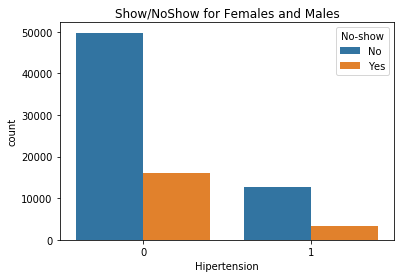

In [68]:
attendance(df , 'No-show' , 'Hipertension')

<a id='eda'></a>
### Hypertension
### does age and Hypertension affect the attendance

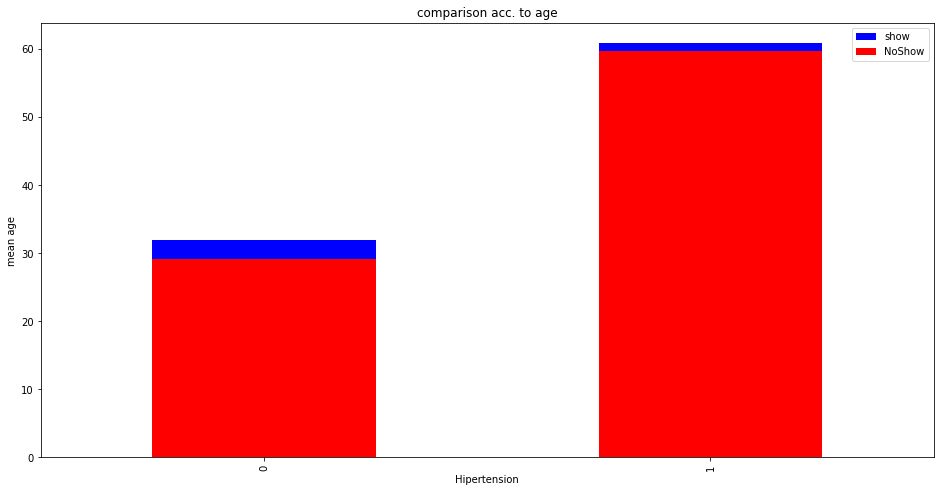

In [124]:
show = df['No-show']=='No'
NoShow = df['No-show']=='Yes'
def attendance(col):
    plt.figure(figsize=[16,8])
    df[show].groupby(col).Age.mean().plot(kind='bar',color='blue', label='show')
    df[NoShow].groupby(col).Age.mean().plot(kind='bar',color='red', label='NoShow')
    plt.legend();
    plt.title('comparison acc. to age')
    plt.xlabel(col)
    plt.ylabel('mean age');
attendance('Hipertension')

In [125]:
df[show].groupby("Hipertension").Age.mean()
df[NoShow].groupby("Hipertension").Age.mean()

Hipertension
0    29.151237
1    59.721103
Name: Age, dtype: float64

mean age of non Hypertension showing patients is 29.23 and no showing is 59.72 mean age of Hypertension

<a id='eda'></a>
### Diabetes
### does age and Diabetes affect the attendance

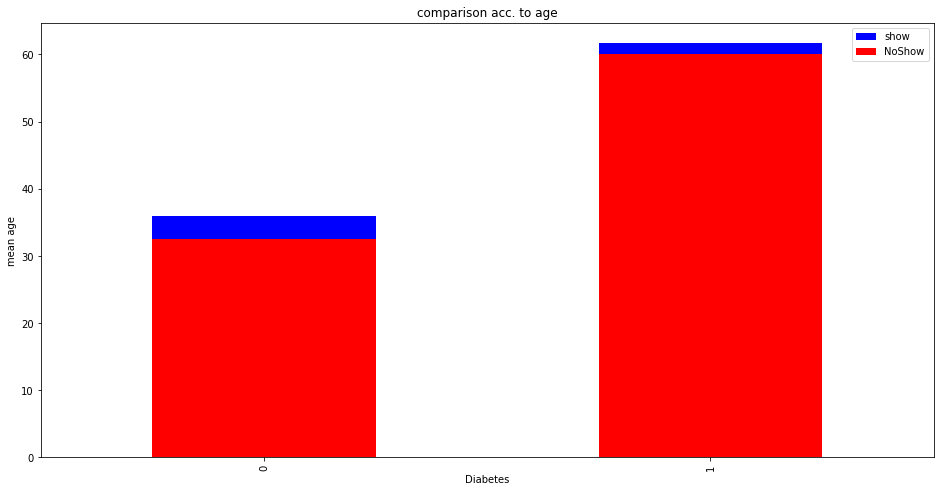

In [64]:
attendance('Diabetes')

In [126]:
df[show].groupby("Diabetes").Age.mean()
df[NoShow].groupby("Diabetes").Age.mean()

Diabetes
0    32.555125
1    60.064336
Name: Age, dtype: float64

mean age of non Diabetes showing patients is 32.62 and no showing is 60.08 mean age of Diabetes

<a id='eda'></a>
### does age and gender affect the attendance

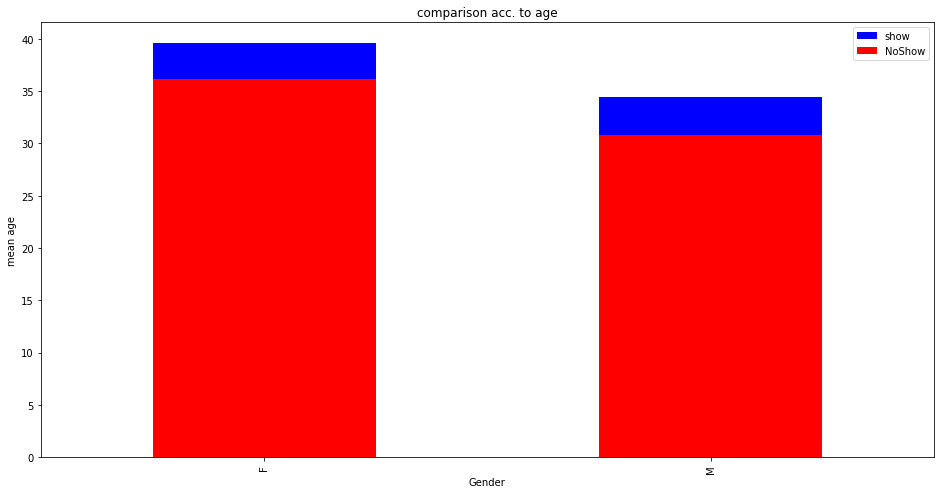

In [127]:
attendance('Gender')

In [128]:
df[show].groupby("Gender").Age.mean()
df[NoShow].groupby("Gender").Age.mean()

Gender
F    36.16219
M    30.83301
Name: Age, dtype: float64

<a id='eda'></a>
### does neighbourhood affect the attendance


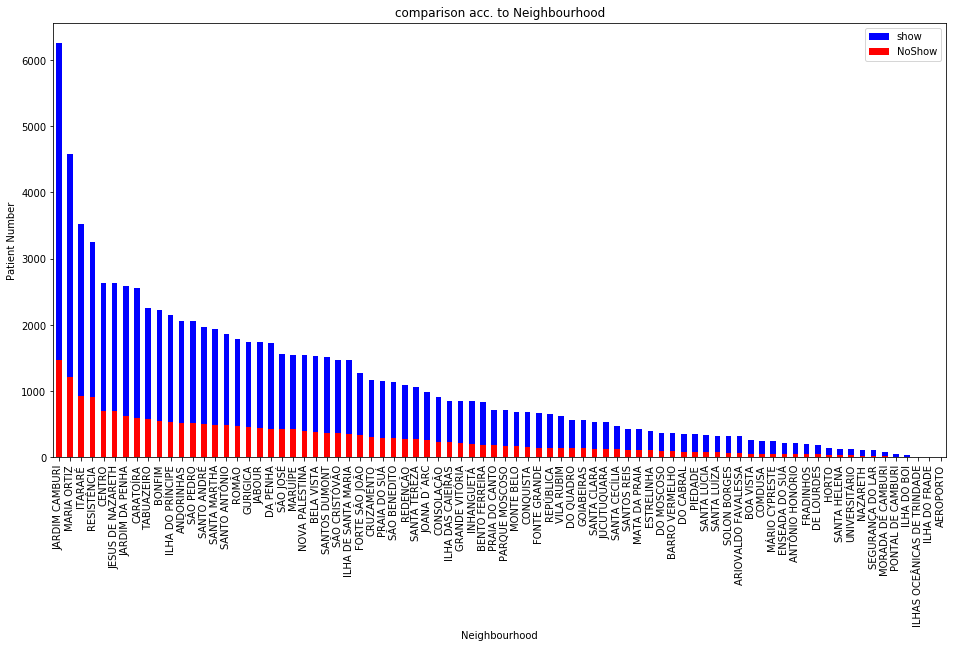

In [129]:
#def attendance(col):
plt.figure(figsize=[16,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue', label='show')
df.Neighbourhood[NoShow].value_counts().plot(kind='bar',color='red', label='NoShow')
plt.legend();
plt.title('comparison acc. to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient Number');
#attendance('Hipertension')

<a id='eda'></a>
### does age and Neighbour hoodaffect the attendance

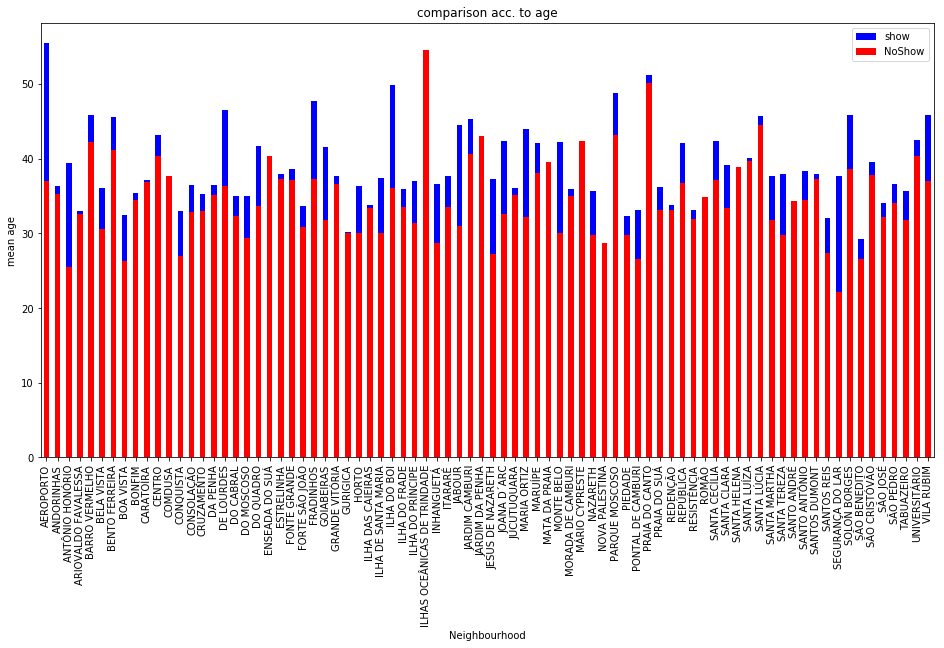

In [130]:
attendance('Neighbourhood')

Patients attendance from specific neighbourhood different acc. ages AEROPORTO  then ILHA are with high ages attendance

<a id='conclusions'></a>
## Conclusions

> From the feature importance, we could see that Gender, Age, Neighbourhood, and Hypertension are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.

### Limitations
> The reason for the appointment and the doctor specialization could help in making better analysis for the No-Show of a patient


In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0